In [27]:
import os
import pandas as pd
from convert_to_csv import convert_to_csv
import seaborn as sns
import matplotlib.pyplot as plt


## DATA:

In [2]:
convert_to_csv(prefix="../")
df = pd.read_csv("../midterm-2018/data.csv")
df.head()

C:\Users\kalmu\AppData\Local\Temp/ipykernel_41596/1013483409.py:2: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../midterm-2018/data.csv")


,probe_timestamp,user_id,screen_name,name,description,user_created_at,url,lang,protected,verified,geo_enabled,profile_use_background_image,default_profile,followers_count,friends_count,listed_count,favourites_count,statuses_count,tid,label
0,Tue Nov 06 20:35:08 2018,4107317134,danitheduck21,Dani🏳️‍🌈,Dani 💜 She/Her 💜 Randomness all over. Expect l...,Tue Nov 03 21:16:13 2015,NaN,en,False,False,False,False,False,481,870,26,6542,67025,1059907055421509632,human
1,Tue Nov 06 17:57:51 2018,4858296837,ncaraballoPR,Natalie Caraballo,"Things I don’t get tired of: Politics, Amy Win...",Thu Jan 28 20:03:51 2016,NaN,en,False,False,False,False,False,202,712,5,1515,158,1059867472810180609,human
2,Tue Nov 06 20:35:23 2018,232631847,drmendezmd,Wilson,"Latin american100%! Let fight for our country,...",Fri Dec 31 18:55:05 2010,NaN,en,False,False,True,True,True,278,342,4,4780,4029,1059907117094711296,human
3,Tue Nov 06 19:23:19 2018,16700555,ScottNevins,Scott Nevins,TV Personality & Host | Political/News Contrib...,Sat Oct 11 21:39:34 2008,http://www.ScottNevins.com,en,False,True,False,True,False,29546,384,402,143163,53427,1059888980957650944,human
4,Tue Nov 06 20:35:24 2018,334443152,lild1206,D,NaN,Wed Jul 13 03:13:52 2011,NaN,en,False,False,True,True,True,95,668,1,1178,1315,1059907122408898562,human


In [6]:
# fill descriptions with empty strings if not provided
df['description'].fillna('', inplace=True)

In [7]:
df.describe()

,user_id,followers_count,friends_count,listed_count,favourites_count,statuses_count,tid
count,5.053700e+04,5.053700e+04,50537.000000,50537.000000,50537.000000,50537.000000,5.053700e+04
mean,8.925762e+17,2.646671e+03,291.853157,15.767556,2314.882522,2450.896076,1.057336e+18
std,3.635423e+17,2.322737e+05,2671.700187,449.022183,12672.756530,13770.362987,6.132038e+15
min,7.461300e+04,0.000000e+00,0.000000,0.000000,0.000000,1.000000,7.960691e+17
25%,9.868175e+17,0.000000e+00,0.000000,0.000000,0.000000,8.000000,1.052275e+18
50%,1.052364e+18,1.000000e+00,9.000000,0.000000,0.000000,30.000000,1.057426e+18
75%,1.056739e+18,1.600000e+01,141.000000,0.000000,75.000000,147.000000,1.059911e+18
max,1.078964e+18,5.086590e+07,298234.000000,67930.000000,463821.000000,599307.000000,1.078970e+18


### CLASS DISTRIBTION:

In [8]:
label_counts = df['label'].value_counts()
label_counts

bot      42445
human     8092
Name: label, dtype: int64

As we can see class distribution is highly unbalanced, therefore we will need to think of a way to counter that problem

## Profile Descriptions:

In [21]:
df['description_length'] = df['description'].apply(len)

average_length = df['description_length'].mean()
min_length = df['description_length'].min()
max_length = df['description_length'].max()

print(f"Average length of description: {average_length}")
print(f"Minimum length of description: {min_length}")
print(f"Maximum length of description: {max_length}")

print(f"Value counts:\n{df['description_length'].value_counts().iloc[:10]}")
print(f"Number of longer (100 >) descriptions: {sum(df['description_length'] > 100)}")

Average length of description: 34.613372380632015
Minimum length of description: 0
Maximum length of description: 197
Value counts:
0      28223
39       895
35       535
32       530
160      432
40       353
159      329
36       290
158      271
33       255
Name: description_length, dtype: int64
Number of longer (100 >) descriptions: 7944


About 50% of profiles have no description provided, however there are a fair amount of longer descriptions, that can provide insightful information about profile

In [24]:
label_counts = df[df['description_length'] > 100]['label'].value_counts()
label_counts

human    3984
bot      3960
Name: label, dtype: int64

As we can see profiles with longer descriptions are much more balanced, therefore can prove to be more of a challange

## CORRELATION

In [50]:
df['label_binary'] = df['label'] == 'human'
df['label_binary'] = df['label_binary'].astype(int)

numerical_cols = df.select_dtypes(include=['number'])

correlation_matrix = numerical_cols.corr()

correlation_matrix

,user_id,followers_count,friends_count,listed_count,favourites_count,statuses_count,tid,description_length,label_binary
user_id,1.000000,-0.027263,-0.177203,-0.084156,-0.385355,-0.392062,-0.182258,-0.447698,-0.867180
followers_count,-0.027263,1.000000,0.047257,0.794138,0.006466,0.031690,0.004433,0.009101,0.025907
friends_count,-0.177203,0.047257,1.000000,0.108584,0.173865,0.237953,0.033123,0.144893,0.184956
listed_count,-0.084156,0.794138,0.108584,1.000000,0.042420,0.123771,0.013854,0.047047,0.079982
favourites_count,-0.385355,0.006466,0.173865,0.042420,1.000000,0.548453,0.072500,0.241515,0.404074
statuses_count,-0.392062,0.031690,0.237953,0.123771,0.548453,1.000000,0.069840,0.235255,0.387108
tid,-0.182258,0.004433,0.033123,0.013854,0.072500,0.069840,1.000000,0.143352,0.176335
description_length,-0.447698,0.009101,0.144893,0.047047,0.241515,0.235255,0.143352,1.000000,0.489287
label_binary,-0.867180,0.025907,0.184956,0.079982,0.404074,0.387108,0.176335,0.489287,1.000000


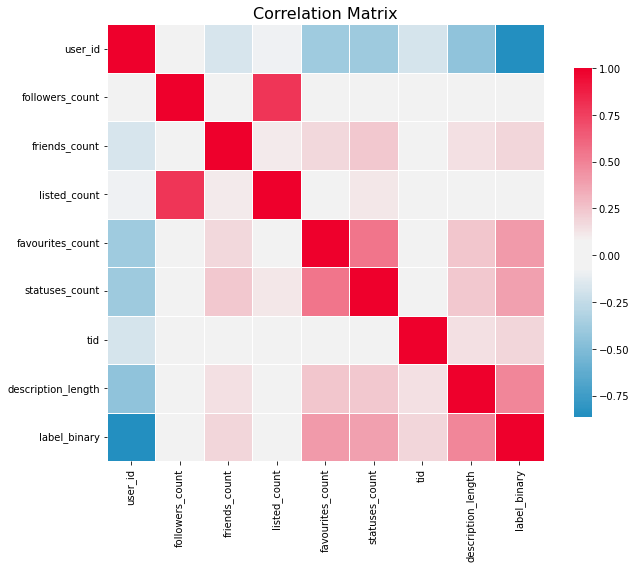

In [51]:
cmap = sns.diverging_palette(240, 10, as_cmap=True, s=100, l=50, sep=20)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, fmt=".2f", cmap=cmap, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .8})

plt.title('Correlation Matrix', fontsize=16)
plt.xticks()
plt.yticks()
plt.tight_layout()
plt.show()

As we already deduced before description length has a big immpact on label, however on a matrix we can see 3 other important factors:
- statuses_count
- favourites_count
- followers_count 


Of course user_id is also very highly correlated however it is unusable, since it should be unique and each new user will have different one

In [52]:
print(f"Favourites value counts:\n{df['favourites_count'].value_counts()}")
print('-'*50)
print(f"Statuses value counts:\n{df['statuses_count'].value_counts()}")
print('-'*50)
print(f"Followers value counts:\n{df['followers_count'].value_counts()}")

Favourites value counts:
0        27790
1         1063
2          667
3          554
4          457
         ...  
38834        1
5772         1
10346        1
30912        1
797          1
Name: favourites_count, Length: 6414, dtype: int64
--------------------------------------------------
Statuses value counts:
1        2235
2        2057
3        1780
4        1666
5        1474
         ... 
22719       1
50685       1
42021       1
9737        1
1533        1
Name: statuses_count, Length: 6591, dtype: int64
--------------------------------------------------
Followers value counts:
0        24717
1         5122
2         2420
3         1387
4          883
         ...  
4963         1
3690         1
1823         1
16373        1
1696         1
Name: followers_count, Length: 3012, dtype: int64
